In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy import stats
import itertools
import pylab as p
from random import shuffle
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from nltk.stem.porter import PorterStemmer
import re
import seaborn as sb
from tabletext import to_text
from IPython.display import HTML
from collections import Counter
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
get_ipython().magic('matplotlib inline')
get_ipython().magic("config InlineBackend.figure_format = 'svg'")
import urllib
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
porter_stemmer = PorterStemmer()


In [14]:
data = pd.read_csv("/home/arikan/UT/Spring2017/DataMining/Data-Mining-Project/data.csv", encoding = "ISO-8859-1")

In [15]:
data["decade"] = data.Year.apply(lambda x: (x - x % 10) )
data["Lyrics"] = data.Lyrics.fillna("")
data["Artist"] = data.Artist.apply(lambda artist: ",".join(re.split(" and | featuring ", artist)))
data["CharCount"] = data.Lyrics.apply(lambda x: len(x))
data["WordCount"] = data.Lyrics.apply(lambda x: len(x.split(' ')))
data["UniqWordCount"] = data.Lyrics.apply(lambda x: len(set(x.split(' '))))
data

,Rank,Song,Artist,Year,Lyrics,Source,decade,CharCount,WordCount,UniqWordCount
0,1,wooly bully,"sam the sham,the pharaohs",1965,sam the sham miscellaneous wooly bully wooly b...,3.0,1960,662,128,65
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,1960,995,206,95
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,1960,2,3,1
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,1960,692,154,45
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,1960,1173,234,89
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,1960,1333,241,121
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,1960,1089,228,76
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,1960,1052,217,73
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,1960,738,150,80
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,1960,680,153,61


In [16]:
tv = CountVectorizer()
X = tv.fit_transform(data.Lyrics)
def arrangeTestIndices(percent):
    test_indices = np.random.choice(len(data), int(len(data)/percent))
    train_indices = [i for i in range(len(data)) if i not in test_indices ]
    trainX = X[train_indices].toarray()
    testX = X[test_indices].toarray()
    return (trainX,train_indices, test_indices)


In [ ]:
def train(classifier, trainX, train_indices):
    svc = classifier()
    y = []
    for i in train_indices:
        y.append(data.decade[i])
    svc.fit(trainX, y)
    return svc

In [ ]:
def train(classifier, trainX, train_indices):
    svc = classifier()
    y = []
    for i in train_indices:
        y.append(data.decade[i])
    svc.fit(trainX, y)
    return svc

In [100]:
def train(classifier, trainX, train_indices):
    svc = classifier()
    y = []
    for i in train_indices:
        y.append(data.decade[i])
    svc.fit(trainX, y)
    return svc


def test(test_indices, svc):
    d_contingency = dict()
    for decade in set(data.decade):
        d_contingency[decade] = [[0,0],[0,0]]
    for table in d_contingency.keys():
        c_table = d_contingency[table]
        for i in test_indices:
            real = data.decade[i]
            predicted = svc.predict(X[i])
            if(real == table):
                if(real == predicted):
                    c_table[0][0]+=1
                else:
                    c_table[0][1] +=1
            else:
                if(real == predicted):
                    c_table[1][1]+=1
                else:
                    c_table[1][0] +=1
        d_contingency[table] = c_table       
    return d_contingency

def test2(test_indices, svc, decade):
    realArr = []
    output = []
    random.shuffle(test_indices)
    for i in test_indices:
        real = data.decade[i]
        predicted = svc.predict(X[i])
        #print(svc.predict_proba(X[i]))
        realArr.append(1) if(real == decade) else realArr.append(0)
        output.append(svc.predict_proba(X[i])[0][(decade - 1960)/10 ])
        #output.append(1) if(predicted == 2000) else output.append(0)
    df = pd.DataFrame()
    df["real"] = realArr
    df["out"] = output
    df = df.sort_values(['out'], ascending=True)
    return df

            
def classify(classifier, trainX, train_indices, test_indices):
    svc = train(classifier, trainX, train_indices)
    points = []
    for decade in decades:
        df  = test2(test_indices, svc, decade)
        fpr1, tpr1, _ = metrics.roc_curve(np.array(df.real), np.array(df.out), pos_label=1)
        points.append((fpr1, tpr1))
    draw_rocs(points)

In [103]:
def randomlyClassifyTest(n=5):
    (trainX, train_indices, test_indices) = arrangeTestIndices(n)
    return classify(MultinomialNB, trainX, train_indices, test_indices )
def pretty_table(table, left, up):
    f11 = table[0][0]
    f10 =table[0][1]
    f01 = table[1][0]
    f00 =table[1][1]
    f1p = f11 + f10
    fp1  = f11 +f01
    fp0 = f10 + f00
    f0p = f01 +f00
    T = f1p + f0p
    ptable = []
    ptable.append(["", up, "~"+up, "Total"])
    ptable.append([left,f11,f10,f1p])
    ptable.append(["~"+left,f01,f00,f0p])
    ptable.append(["Total",fp1,fp0,T])
    return to_text(ptable)

colors = ['r', 'b', 'g', 'y', 'k', 'w']
decades = [1960, 1970, 1980, 1990, 2000, 2010]
def draw_rocs(points, fpr_en = None, tpr_en = None):
    plt.figure(figsize=(12, 8))
    lw = 2
    for i, (fpr, tpr) in enumerate(points):
        lbl = "ROC Curve for " + str(decades[i]) + " (area = %0.2f)" % metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=lw, label=lbl)
            
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    

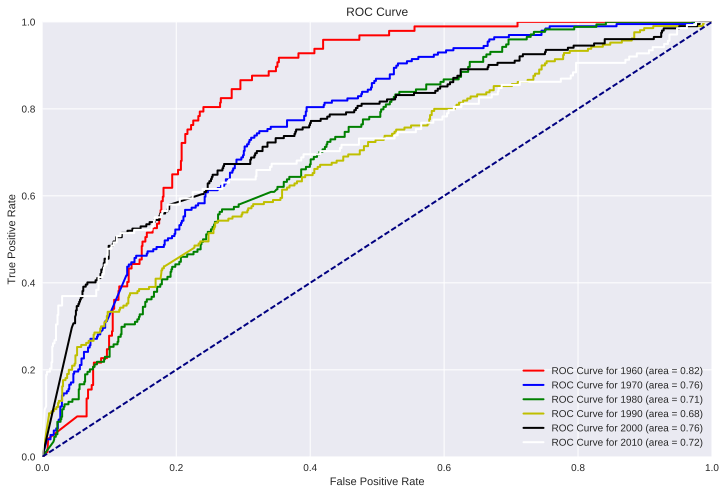

In [104]:
results = randomlyClassifyTest()



chicago                44
pink                   43
michael jackson        42
aretha franklin        31
elton john             26
madonna                24
mariah carey           23
rod stewart            23
stevie wonder          20
usher                  18
whitney houston        15
britney spears         14
janet jackson          14
kelly clarkson         13
maroon 5               11
the beatles            11
rihanna                10
taylor swift            8
the black eyed peas     8
katy perry              6
Name: Career, dtype: int64

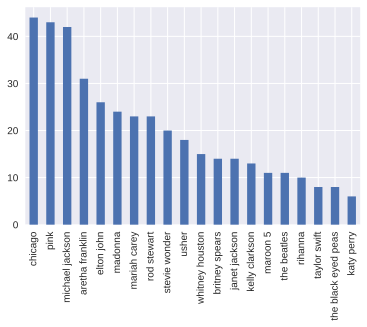

In [10]:
df = dict()
popular_artists = data.Artist.value_counts()[:20]
for artist in popular_artists.to_dict().keys():
    span = data[data.Artist.str.contains(artist)].Year.sort_values().unique().tolist()
    start = span[0]
    end = span[-1]
    df[artist] = (end -start)
    
df = pd.DataFrame.from_dict(df, orient="index")
df.columns =["Career"]
df = df.Career.sort_values(ascending=False)
df.plot.bar()
df

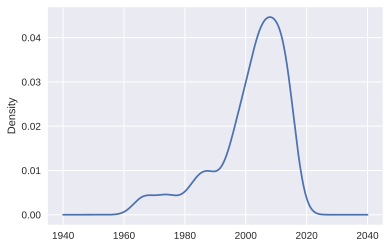

In [11]:

data[data.Artist.str.contains(",")].Year.plot.kde()

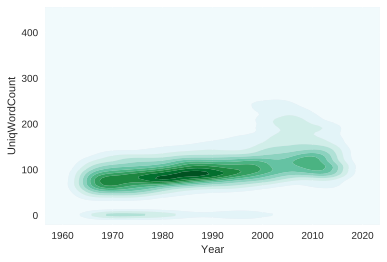

In [12]:

sb.kdeplot(data.Year, data["UniqWordCount"], shade=True)